In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

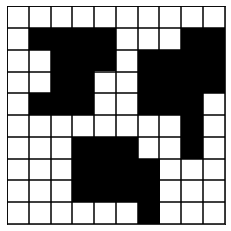

In [37]:
img = np.array([[1,1,1,1,1,1,1,1,1,1],
          [1,0,0,0,0,1,1,1,0,0],
          [1,1,0,0,0,1,0,0,0,0],
          [1,1,0,0,1,1,0,0,0,0],
          [1,0,0,0,1,1,0,0,0,1],
          [1,1,1,1,1,1,1,1,0,1],
          [1,1,1,0,0,0,1,1,0,1],
          [1,1,1,0,0,0,0,1,1,1],
          [1,1,1,0,0,0,0,1,1,1],
          [1,1,1,1,1,1,0,1,1,1]], dtype = 'int32'
         )
img *= 255
fig = plt.figure()
plt.imshow(img, cmap = "gray")
plt.xticks(np.arange(-0.5,10.5,1))
plt.yticks(np.arange(-0.5,10.5,1))
plt.tick_params(bottom=False, left=False)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.grid(True, linewidth = 1.5, color = 'k')
#fig.savefig('seg0101.jpg')

In [38]:
img = cv2.imread('seg0101.jpg',0)
img.shape

(288, 432)

In [39]:
img = cv2.imread('seg0101.jpg',0)
x = 112
y = 34

w = 220
h = 220

crop_img = img[y:y+h, x:x+w]
#cv2.imwrite('seg0101_crop.jpg',crop_img)
cv2.imshow('crop_image',crop_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

class Point(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y

def getGrayDiff(img,currentPoint,tmpPoint):
    return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))

def count_size(seedMark):
    size = 0
    for i in range(seedMark.shape[0]):
        for j in range(seedMark.shape[1]):
            if seedMark[i][j] == 0:
                size += 1 
    print("Size: ", round(size/484))
    return size

def regionWork(thresh,seedMark,seedList):
    global InterMark
    InterMark = np.ones(img.shape)*255
    height, weight = img.shape
    label = 0
    connects = [ Point(0, -1), Point(1, 0),Point(0, 1), Point(-1, 0)]
    while(len(seedList)>0):        
        currentPoint = seedList.pop(0)
        InterMark[currentPoint.x,currentPoint.y] = label
        seedMark[currentPoint.x,currentPoint.y] = label
        for i in range(4):
            tmpX = currentPoint.x + connects[i].x
            tmpY = currentPoint.y + connects[i].y
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                continue
            grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
            if grayDiff < thresh and seedMark[tmpX,tmpY] == 255:
                InterMark[tmpX,tmpY] = label
                seedMark[tmpX,tmpY] = label
                seedList.append(Point(tmpX,tmpY))
    size = count_size(InterMark)
    cv2.imshow('Sliced',InterMark)
    cv2.waitKey(0)
    return seedMark
    
def regionGrow(img,seeds):    
    seedMark = np.ones(img.shape)*255
    seedList = []
    for seed in seeds:
        seedList.append(seed)             
        seedMark = regionWork(10,seedMark,seedList)                
    return seedMark


img = cv2.imread('seg0101_crop.jpg',0)
seeds = [Point(30,30),Point(150,180),Point(150,100)]
FinalImg = regionGrow(img,seeds)
cv2.imshow('Final',FinalImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

Size:  12
Size:  15
Size:  12
